# Insurance Claims- Fraud Detection

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dipesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import the dataset
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Pre-processing

In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Dropping unnecessary column

In [6]:
#Removing unncessary columns
df.drop(['_c39' ],axis=1,inplace = True)

## Checking for duplicates

In [7]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [8]:
for column in df:
    print(df[column])

0      328
1      228
2      134
3      256
4      228
      ... 
995      3
996    285
997    130
998    458
999    456
Name: months_as_customer, Length: 1000, dtype: int64
0      48
1      42
2      29
3      41
4      44
       ..
995    38
996    41
997    34
998    62
999    60
Name: age, Length: 1000, dtype: int64
0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64
0      17-10-2014
1      27-06-2006
2      06-09-2000
3      25-05-1990
4      06-06-2014
          ...    
995    16-07-1991
996    05-01-2014
997    17-02-2003
998    18-11-2011
999    11-11-1996
Name: policy_bind_date, Length: 1000, dtype: object
0      OH
1      IN
2      OH
3      IL
4      IL
       ..
995    OH
996    IL
997    OH
998    IL
999    OH
Name: policy_state, Length: 1000, dtype: object
0       250/500
1       250/500
2       100/300
3       250/500
4   

In [9]:
df.replace('?', np.nan, inplace = True)

### Checking the datatypes of all columns

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [11]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
df.isnull().sum()/df.shape[0]*100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

## Treating the Null values By Simple Imputer

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['collision_type','property_damage','police_report_available']])
df[['collision_type','property_damage','police_report_available']] = imputer.transform(df[['collision_type','property_damage','police_report_available']])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [16]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
df.incident_date

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [18]:
print(pd.Timestamp.min)

1677-09-21 00:12:43.145224193


In [19]:
print(pd.Timestamp.max)

2262-04-11 23:47:16.854775807


In [21]:
df.incident_date = pd.to_datetime(df.incident_date, errors = 'coerce')

In [22]:
print(df.incident_date)

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-10-01
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]


In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Adding 3 More Columns that is DAY,MONTH,YEAR

In [24]:
df['Day'] = df['incident_date'].dt.day
df['month'] = df['incident_date'].dt.month
df['year'] = df['incident_date'].dt.year

In [25]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,month,year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,25,1,2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,21,1,2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,22,2,2015
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,10,2015
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,17,2,2015


### Dropping unncessary columns

In [26]:
#Removing unncessary columns
df.drop(['policy_number','policy_bind_date','policy_state','policy_csl','umbrella_limit','insured_zip','insured_hobbies','incident_location','auto_year','auto_model','incident_date'],axis=1,inplace = True)

In [27]:
df.shape

(1000, 31)

In [28]:
df.nunique()

months_as_customer             391
age                             46
policy_deductable                3
policy_annual_premium          991
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make                       14
fraud_reported                   2
Day                 

In [29]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'fraud_reported', 'Day',
       'month', 'year'],
      dtype='object')

# EDA and Visualization

********************
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
********************


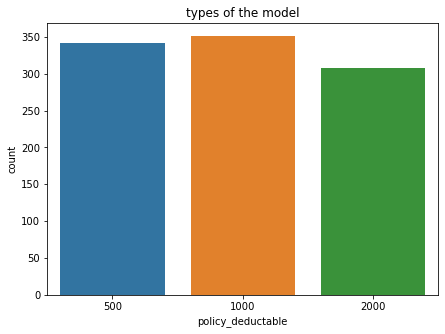

In [30]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='policy_deductable' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.policy_deductable.value_counts())
print('*'*20)
plt.show()

## The policy Deductible (the amount that a policyholder has to pay before the insurance company starts paying up) the starting amount is mostly paid by the policyholder paid is 1000 dollars followed by 500 dollars and 2000 dollars.

********************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
********************


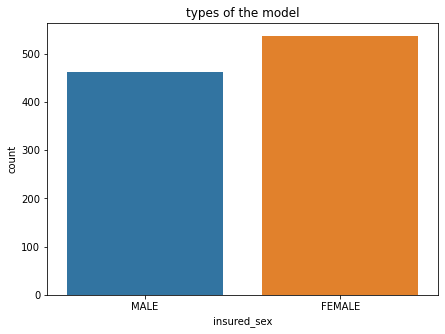

In [31]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='insured_sex' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.insured_sex.value_counts())
print('*'*20)
plt.show()

## From the Above bar graph, we observe 463 people are male and 537 people who are female.

********************
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
********************


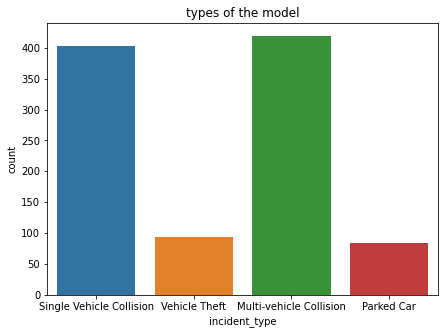

In [32]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='incident_type' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.incident_type.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe the incident types because due to Mutli-vehicle Collisions followed by single vehicle collisions and the least incidents happened due to Vehicle theft and Parked car.

********************
NO     698
YES    302
Name: property_damage, dtype: int64
********************


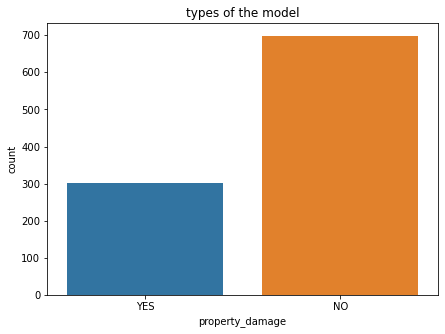

In [33]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='property_damage' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.property_damage.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe From 1000 incidents in 302 incidents the property got damaged, and in 698 incidents there is no property damage.

********************
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
********************


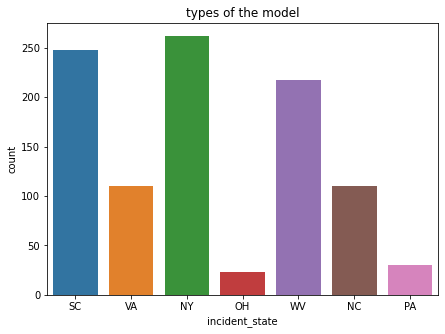

In [34]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='incident_state' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.incident_state.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe the most incident happen in which state the most incident state is NY(New York State), followed by SC(South Carolina), followed by WV(West Virginia), and the least incidents state OH(Ohio).

********************
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
********************


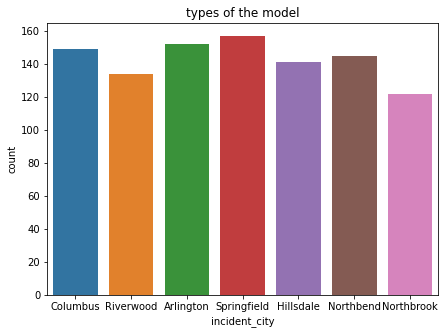

In [35]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='incident_city' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.incident_city.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe the most incident happen in which city the most incident. we observe all city has almost Equal Amount of Incident recorded the most incident city is Springfield followed by Arlington and Columbus and the least incident city is Northbrook.

********************
17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64
********************


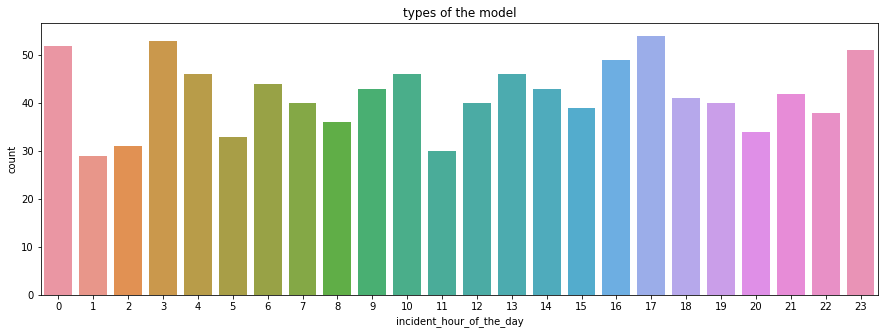

In [36]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='incident_hour_of_the_day' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.incident_hour_of_the_day.value_counts())
print('*'*20)
plt.show()

## From the Above Bar chart, we observe that most of the incidents occurred in the night time as compared to day time.

********************
NO     686
YES    314
Name: police_report_available, dtype: int64
********************


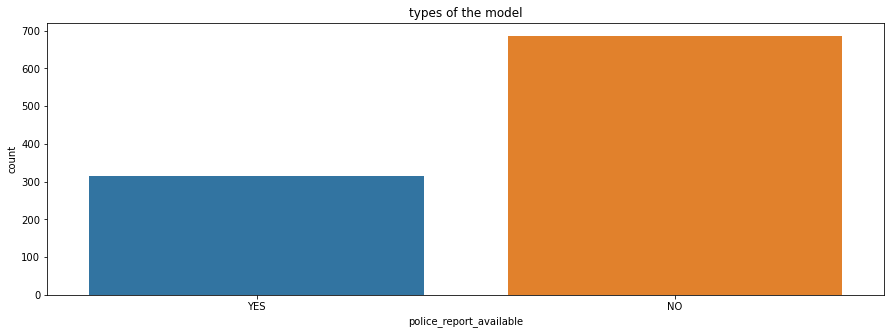

In [37]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='police_report_available' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.police_report_available.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe from all the incidents only 314 incidents have Police reports available and 686 incidents they don not have police reports available.

********************
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
********************


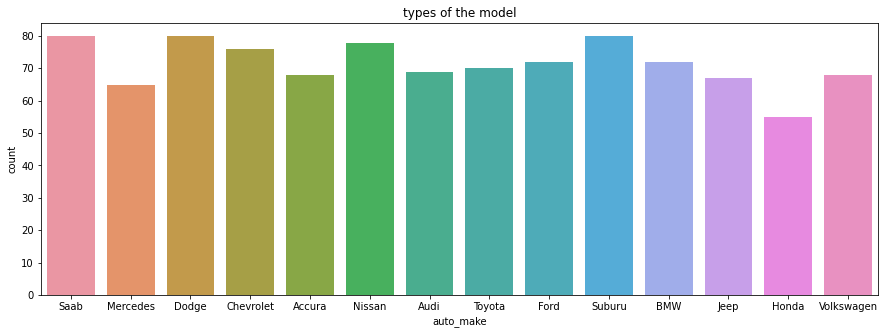

In [38]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='auto_make' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.auto_make.value_counts())
print('*'*20)
plt.show()

## From the above bar chart, we observe From 1000 incidents Saab, Dodge, and Suburu auto car has maximum Incidents where as Honda auto car has the least incidents.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
********************


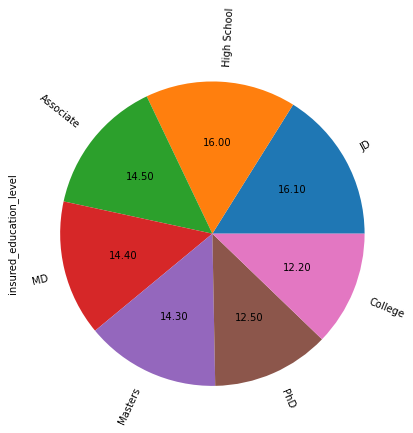

In [39]:
plt.figure(figsize=(7,7))
df['insured_education_level'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0,0,0,0])
print(df.insured_education_level.value_counts())
print('*'*20)
plt.show()

## From the Above pie chart, we observe the insured Education level most of the people are  Juris Doctor (JD), followed by high school students and the least are Ph.D. and college students.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
********************


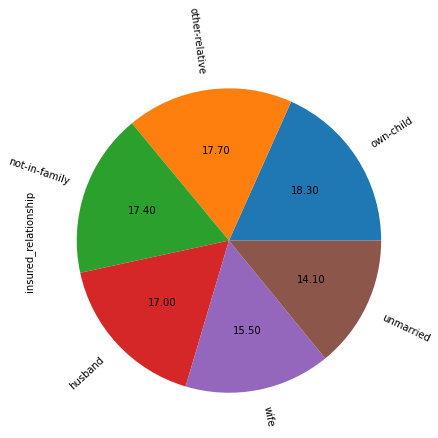

In [40]:
plt.figure(figsize=(7,7))
df['insured_relationship'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0,0,0])
print(df.insured_relationship.value_counts())
print('*'*20)
plt.show()

## From the above Pie chart, we observe insured_relationship the most are Relationship is Own-child, followed by Other relatives and less insured_relationship are among Unmarried.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
********************


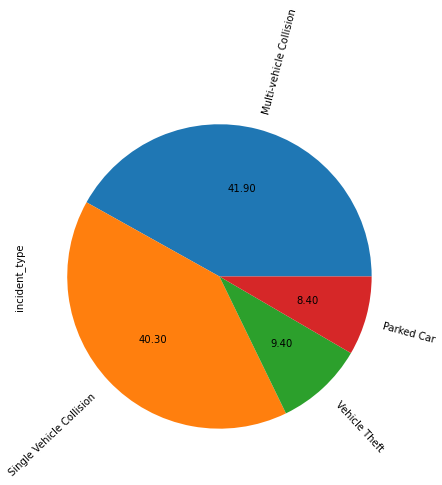

In [41]:
plt.figure(figsize=(7,7))
df['incident_type'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0])
print(df.incident_type.value_counts())
print('*'*20)
plt.show()

## From the above pie chart, we observe the incident type around 42% are Multi-vehicle Collision followed by around 41% single-Vehicle collisions and least is around 8.5% which is Parked cars.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
********************


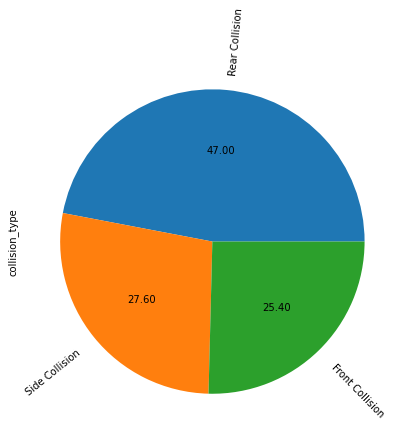

In [42]:
plt.figure(figsize=(7,7))
df['collision_type'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0])
print(df.collision_type.value_counts())
print('*'*20)
plt.show()

## From the above Pie chart we observe Collision type Most of the collision is Rear collision which is 47% followed by Side collision which is 27.60% and Front Collision which is 25.40%.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
********************


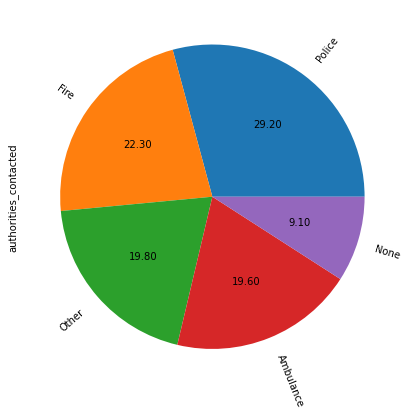

In [43]:
plt.figure(figsize=(7,7))
df['authorities_contacted'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0,0])
print(df.authorities_contacted.value_counts())
print('*'*20)
plt.show()

## From the above pie chart, we observe after the incident happened which authorities have been contacted first is the Police which is 29.20% followed by the Fire department which is 22.30% and in 91 incidents no authorities have been contacted which is 9.10%.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
********************


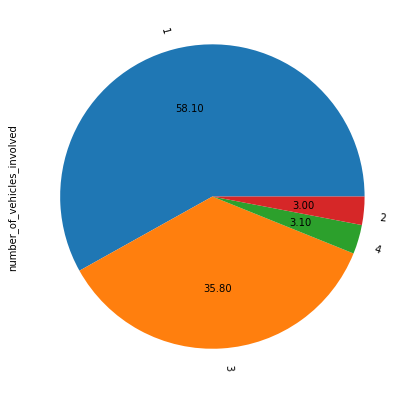

In [44]:
plt.figure(figsize=(7,7))
df['number_of_vehicles_involved'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0])
print(df.number_of_vehicles_involved.value_counts())
print('*'*20)
plt.show()

## From the above Pie chart, we observe the number of vehicles involved in the incidents only 1 vehicle involvement which is 58.10% followed by vehicles which is 35.80%, and the least is 2 vehicles and 4 vehicles which are 3% and 3.10%.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
********************


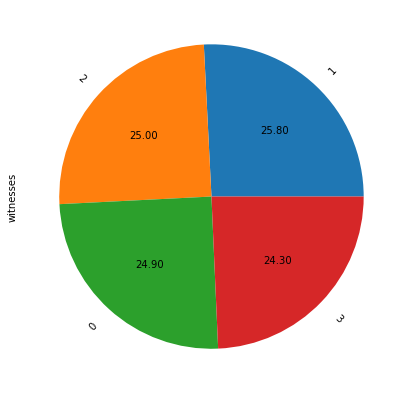

In [45]:
plt.figure(figsize=(7,7))
df['witnesses'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0,0,0])
print(df.witnesses.value_counts())
print('*'*20)
plt.show()

## From the above pie chart, we observe the Witness of the incidents we have 0 witnesses to 3 witnesses and we observe all re equal in amount.

********************
N    753
Y    247
Name: fraud_reported, dtype: int64
********************


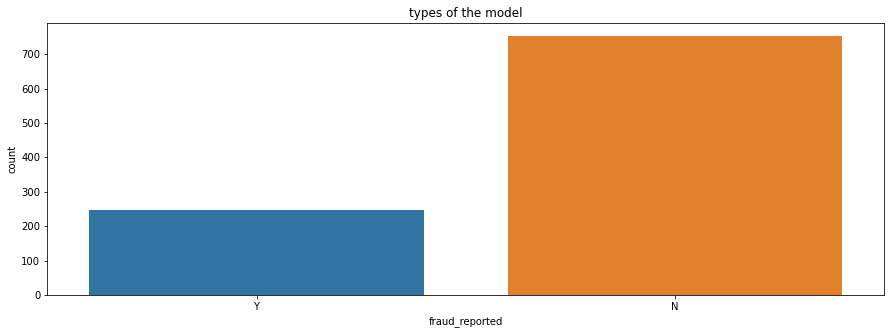

In [46]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='fraud_reported' , data=df)
plt.title('types of the model')
print('*'*20)
print(df.fraud_reported.value_counts())
print('*'*20)
plt.show()

## From the above Bar chart, we observe Fraud-reported is 247 cases and 753 are non-fraud reported and from this, we can conclude that our problem is the im-blance dataset.

## Applying Label Encoder to categorical columns

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()
df1=le.fit_transform(df['insured_sex'])
pd.Series(df1)

0      1
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Length: 1000, dtype: int32

In [49]:
df['insured_sex']=df1

In [50]:
df2=le.fit_transform(df['insured_education_level'])
pd.Series(df2)
df['insured_education_level']=df2

In [51]:
df2=le.fit_transform(df['insured_occupation'])
pd.Series(df2)
df['insured_occupation']=df2

In [52]:
df2=le.fit_transform(df['insured_relationship'])
pd.Series(df2)
df['insured_relationship']=df2

In [53]:
df2=le.fit_transform(df['incident_type'])
pd.Series(df2)
df['incident_type']=df2

In [54]:
df2=le.fit_transform(df['collision_type'])
pd.Series(df2)
df['collision_type']=df2

In [55]:
df2=le.fit_transform(df['incident_severity'])
pd.Series(df2)
df['incident_severity']=df2

In [56]:
df2=le.fit_transform(df['authorities_contacted'])
pd.Series(df2)
df['authorities_contacted']=df2

In [57]:
df2=le.fit_transform(df['incident_state'])
pd.Series(df2)
df['incident_state']=df2

In [58]:
df2=le.fit_transform(df['incident_city'])
pd.Series(df2)
df['incident_city']=df2

In [59]:
df2=le.fit_transform(df['property_damage'])
pd.Series(df2)
df['property_damage']=df2

In [60]:
df2=le.fit_transform(df['police_report_available'])
pd.Series(df2)
df['police_report_available']=df2

In [61]:
df2=le.fit_transform(df['auto_make'])
pd.Series(df2)
df['auto_make']=df2

In [62]:
df2=le.fit_transform(df['fraud_reported'])
pd.Series(df2)
df['fraud_reported']=df2

In [63]:
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim            

In [64]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

    age  insured_sex
3    22     1.000000
43   62     0.750000
39   58     0.750000
36   55     0.714286
7    26     0.653846
23   42     0.625000
38   57     0.625000
37   56     0.625000
31   50     0.615385
35   54     0.600000
9    28     0.600000
27   46     0.575758
25   44     0.562500
32   51     0.555556
28   47     0.541667
34   53     0.538462
10   29     0.514286
44   63     0.500000
45   64     0.500000
16   35     0.500000
13   32     0.500000
2    21     0.500000
24   43     0.448980
21   40     0.447368
41   60     0.444444
29   48     0.440000
17   36     0.437500
30   49     0.428571
4    23     0.428571
11   30     0.428571
26   45     0.423077
22   41     0.422222
20   39     0.416667
12   31     0.404762
40   59     0.400000
18   37     0.390244
8    27     0.375000
15   34     0.363636
19   38     0.357143
14   33     0.307692
33   52     0.250000
6    25     0.214286
42   61     0.200000
5    24     0.100000
1    20     0.000000
0    19     0.000000


43    49
39

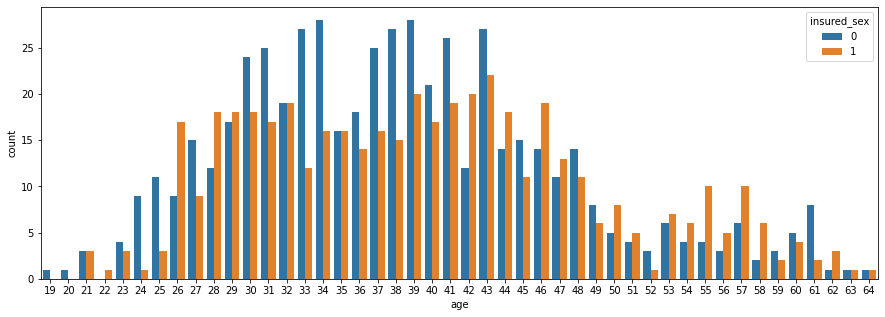

<Figure size 1080x360 with 0 Axes>

In [65]:
plt.figure(figsize = (15, 5))
graphs('age','insured_sex',df)

## From the above Bar chart, we observe that most of the people are from the age group 32 to 43 and above 50 age most of the people are female.

   insured_relationship  insured_sex
5                     5     0.477419
2                     2     0.474576
0                     0     0.470588
4                     4     0.468085
1                     1     0.454023
3                     3     0.437158


3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64




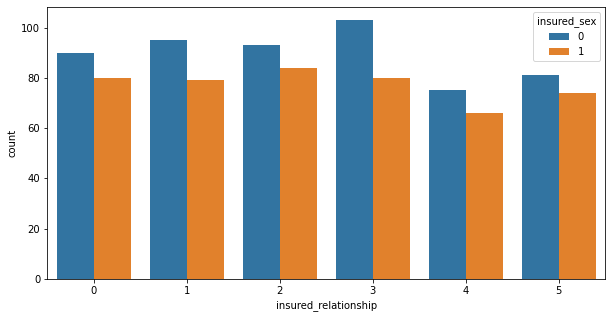

<Figure size 1080x360 with 0 Axes>

In [67]:
plt.figure(figsize = (10, 5))
graphs('insured_relationship','insured_sex',df)

   collision_type  insured_sex
0               0     0.476378
1               1     0.459574
2               2     0.456522


1    470
2    276
0    254
Name: collision_type, dtype: int64




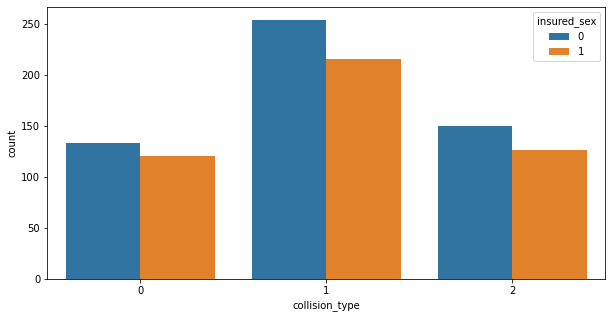

<Figure size 1080x360 with 0 Axes>

In [68]:
plt.figure(figsize = (10, 5))
graphs('collision_type','insured_sex',df)

## From the above Bar chart, we observe Collision types Most collision is a Rear collisions which is 470 incidents followed by Side collision which are 276 incidents, and Front Collision which is 254 incidents.

    incident_hour_of_the_day  insured_sex
15                        15     0.615385
4                          4     0.608696
8                          8     0.583333
22                        22     0.552632
20                        20     0.529412
13                        13     0.521739
0                          0     0.500000
19                        19     0.500000
16                        16     0.469388
17                        17     0.462963
6                          6     0.454545
3                          3     0.452830
21                        21     0.452381
23                        23     0.450980
14                        14     0.441860
5                          5     0.424242
2                          2     0.419355
9                          9     0.418605
10                        10     0.413043
18                        18     0.390244
1                          1     0.379310
12                        12     0.375000
11                        11     0

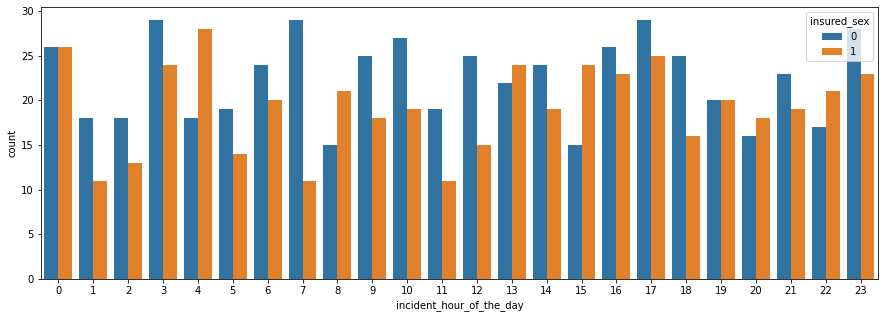

<Figure size 1080x360 with 0 Axes>

In [70]:
plt.figure(figsize = (15, 5))
graphs('incident_hour_of_the_day','insured_sex',df)

In [71]:
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim            

   fraud_reported  insured_sex
1               1     0.489879
0               0     0.454183


0    753
1    247
Name: fraud_reported, dtype: int64




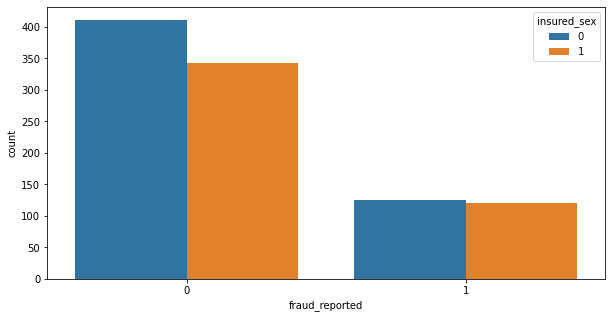

<Figure size 1080x360 with 0 Axes>

In [72]:
plt.figure(figsize = (10, 5))
graphs('fraud_reported','insured_sex',df)

## From the above Bar chart, we observe Fraud-reported is 247 cases and 753 non-fraud reported.

   collision_type     month
0               0  3.515748
1               1  3.423404
2               2  3.278986


1    470
2    276
0    254
Name: collision_type, dtype: int64




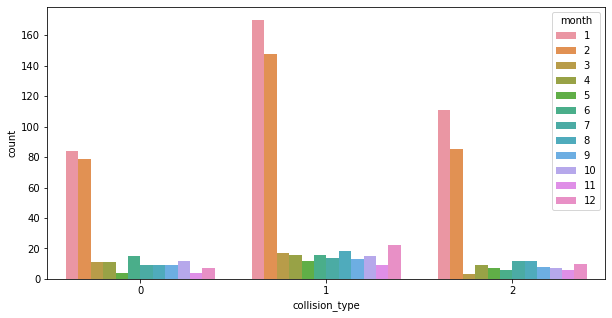

<Figure size 1080x360 with 0 Axes>

In [73]:
plt.figure(figsize = (10, 5))
graphs('collision_type','month',df)

## From the above bar chart, we observe that at starting 2 months the count of accidents occurrence is more in all 3 types of collision.

In [74]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'fraud_reported', 'Day',
       'month', 'year'],
      dtype='object')

## Splitting the label and feature to apply SMOTE

In [75]:
# seperate label n feature
X=df.drop(['fraud_reported' , 'Day'], axis=1)
y=df.fraud_reported

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [78]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 584, 1: 166})

## Import SMOTE

In [79]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [80]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 584, 1: 166})
the number of classes after fit:  Counter({0: 584, 1: 438})


In [81]:
#describe dataset
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,Day,month,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,203.954000,38.948000,1136.000000,1256.406150,0.463000,2.966000,6.653000,2.416000,25126.100000,-26793.700000,...,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,0.247000,13.08400,3.407000,2015.0
std,115.113174,9.140287,611.864673,244.167395,0.498879,1.948497,4.019048,1.681003,27872.187708,28104.096686,...,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,0.431483,10.44318,3.276291,0.0
min,0.000000,19.000000,500.000000,433.330000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1.00000,1.000000,2015.0
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,1.000000,3.000000,1.000000,0.000000,-51500.000000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,0.000000,2.00000,1.000000,2015.0
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,3.000000,7.000000,2.000000,0.000000,-23250.000000,...,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,0.000000,15.00000,2.000000,2015.0
75%,276.250000,44.000000,2000.000000,1415.695000,1.000000,5.000000,10.000000,4.000000,51025.000000,0.000000,...,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,0.000000,22.00000,5.000000,2015.0
max,479.000000,64.000000,2000.000000,2047.590000,1.000000,6.000000,13.000000,5.000000,100500.000000,0.000000,...,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,1.000000,31.00000,12.000000,2015.0


## Observations

1] The dataset contains 1000 Rows and 40 Columns 

2] In dataset _c39 columns we delete it because it is full on nulls 100% null value

3] we replace ? with np.nan and we treat null values by simple imputer

4] there are no duplicates in the dataset

5] We observe there is some problem in capital loss and gain columns

6] we observe standard deviation is higher in total_claim_amount,injury_claim,property_claim and vehicle_claim

## Plotting the heatmap to observe Co-relation

In [82]:
corr=df.corr()
corr.shape

(31, 31)

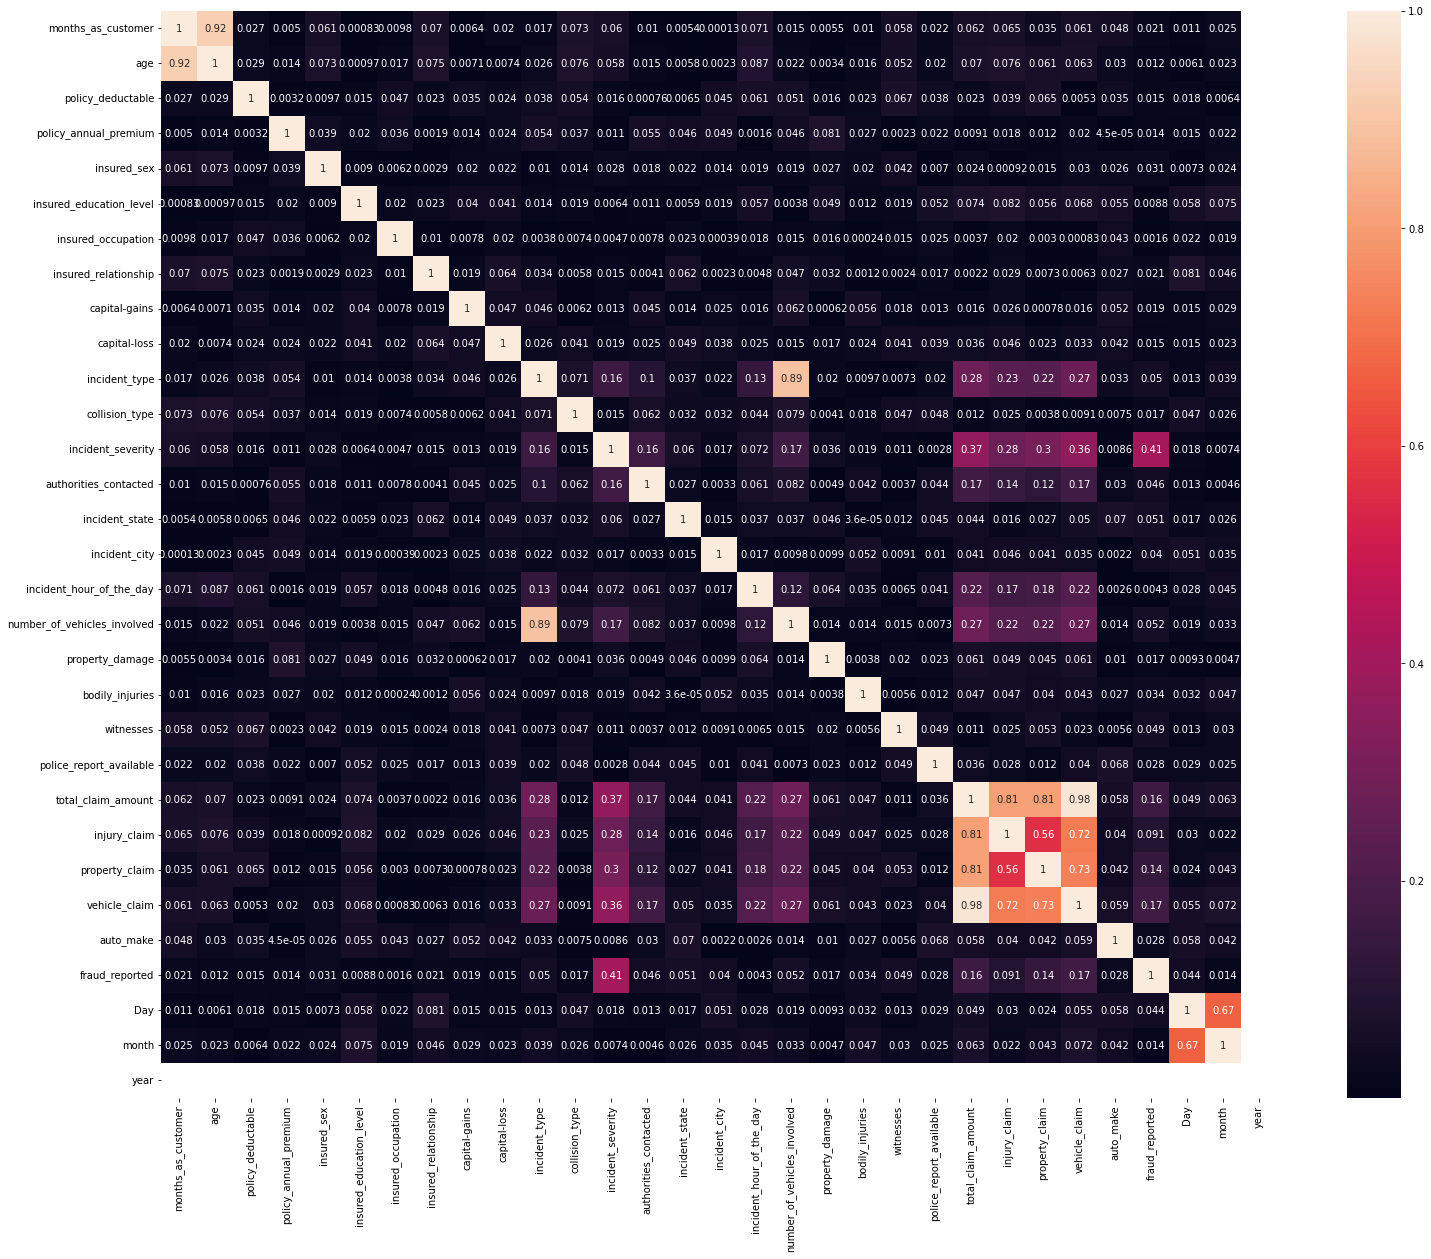

In [83]:
corr=df.corr().abs()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)
plt.show()

## From above Heatmap we observe age vs month-as -customers,number-of-vehicle-involve vs incident type , total-claim-amount vs injuty claim,property claim, vehicle claim, vehicle-claim vs injury-claim,vehicle-claim has very highly co-related and thus we suspect that there are possibility of Multi-colinearity and for that we will plot scatter plot for each and also check VIF 

In [84]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'fraud_reported', 'Day',
       'month', 'year'],
      dtype='object')

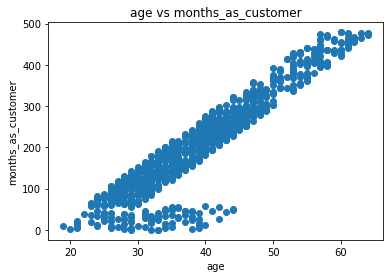

In [85]:
plt.scatter(df['age'],df['months_as_customer'])
plt.xlabel('age')
plt.ylabel('months_as_customer')
plt.title('age vs months_as_customer')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the Age column as it contributes less to our label.

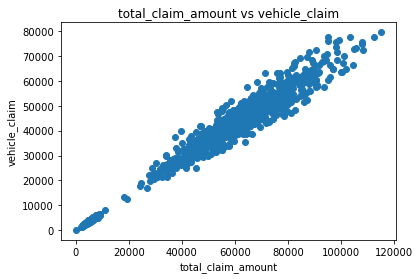

In [87]:
plt.scatter(df['total_claim_amount'],df['vehicle_claim'])
plt.xlabel('total_claim_amount')
plt.ylabel('vehicle_claim')
plt.title('total_claim_amount vs vehicle_claim')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the total_claim_amount column as it contributes less to our label.

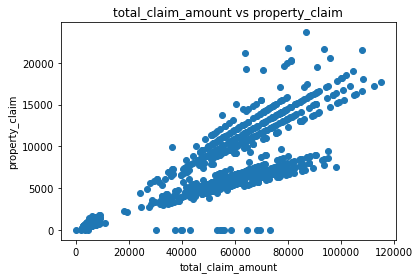

In [89]:
plt.scatter(df['total_claim_amount'],df['property_claim'])
plt.xlabel('total_claim_amount')
plt.ylabel('property_claim')
plt.title('total_claim_amount vs property_claim')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the property_claim column as it contributes less to our label.

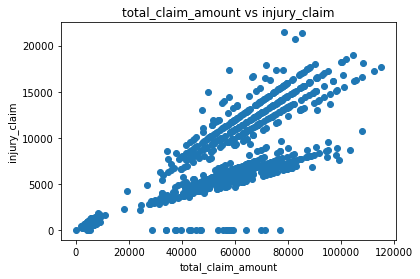

In [91]:
plt.scatter(df['total_claim_amount'],df['injury_claim'])
plt.xlabel('total_claim_amount')
plt.ylabel('injury_claim')
plt.title('total_claim_amount vs injury_claim')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the injury_claim column as it contributes less to our label.

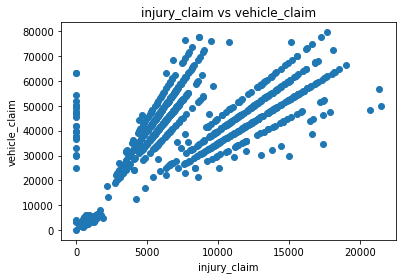

In [93]:
plt.scatter(df['injury_claim'],df['vehicle_claim'])
plt.xlabel('injury_claim')
plt.ylabel('vehicle_claim')
plt.title('injury_claim vs vehicle_claim')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the injury_claim column as it contributes less to our label.

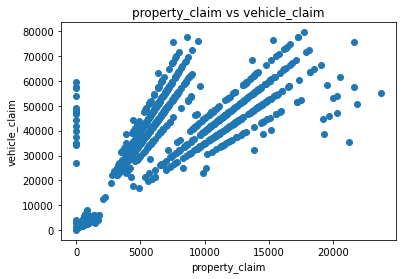

In [95]:
plt.scatter(df['property_claim'],df['vehicle_claim'])
plt.xlabel('property_claim')
plt.ylabel('vehicle_claim')
plt.title('property_claim vs vehicle_claim')
plt.show()

## From the above scatter plot we observe there is a trend and we will delete the property_claim column as it contributes less to our label.

In [97]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'fraud_reported', 'Day',
       'month', 'year'],
      dtype='object')

## Dropping highly co-related features as we saw in the heatmap and in the scatter plot (Multi-colinearity).

In [98]:
#Removing unncessary columns
df.drop(['age','total_claim_amount','injury_claim','property_claim'],axis=1,inplace = True)

In [99]:
df.shape

(1000, 27)

## Plotting Histogram plot to see how data is distributed on an interval scale

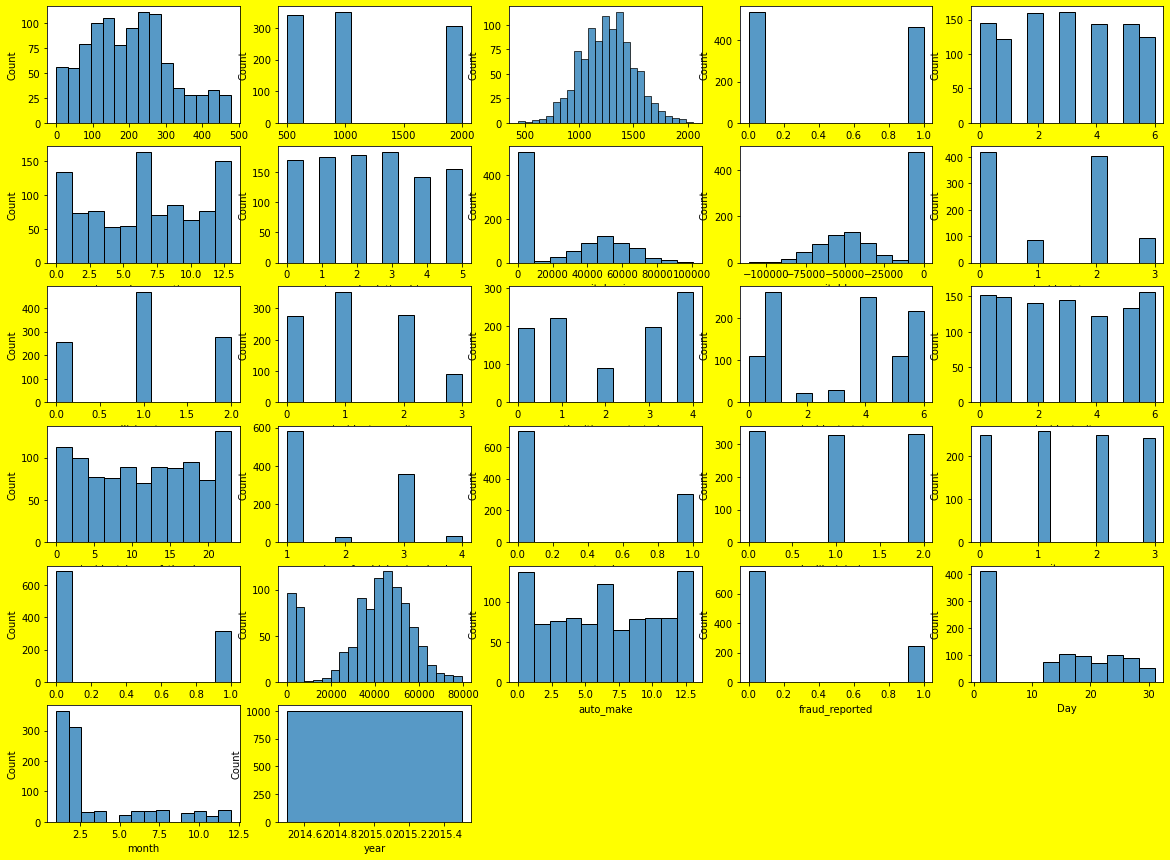

In [100]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(6,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed

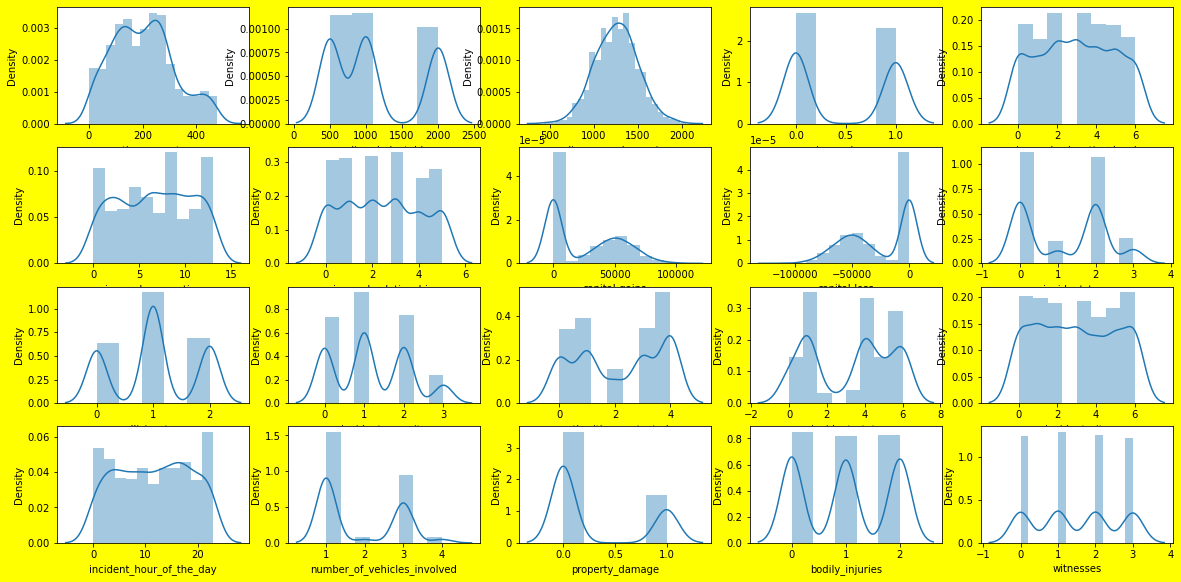

In [101]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From above Histogram and Distribution plot we observe the continious data is skewed 

### Seperating the Feature and Label

In [102]:
# seperate label n feature
X=df.drop(['fraud_reported' , 'Day'], axis=1)
y=df.fraud_reported

## Plotting Scatter plot to see realtion between feature and label

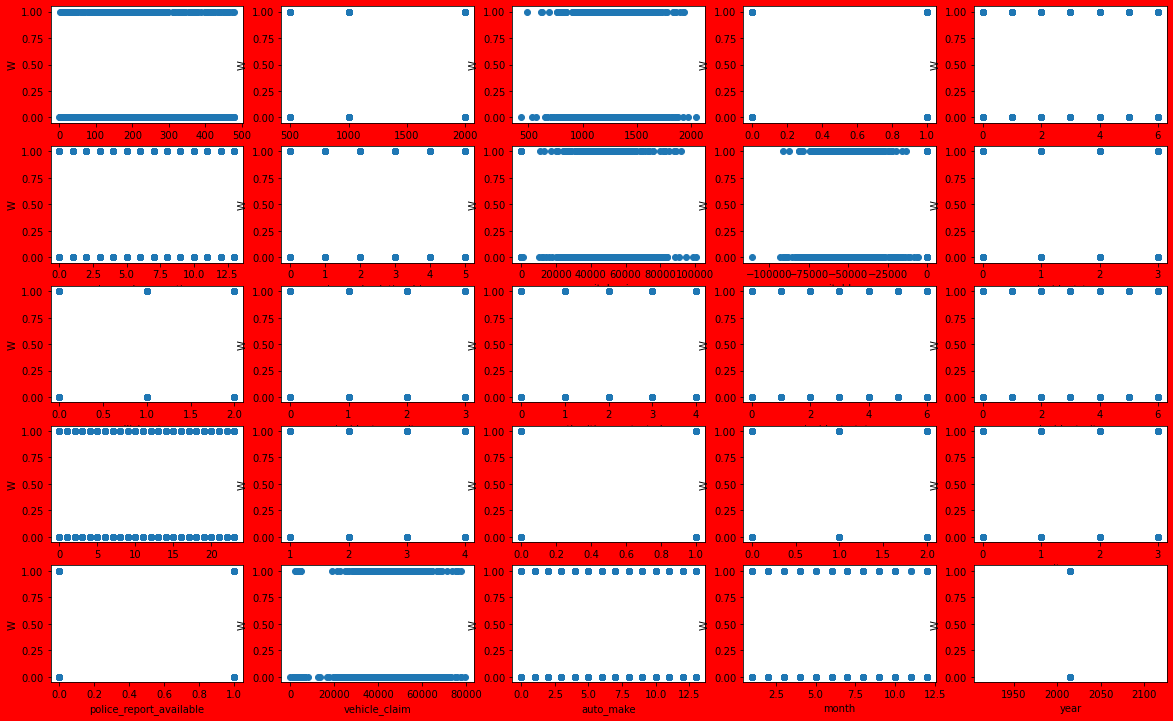

In [103]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 30:
        ax = plt.subplot(6,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

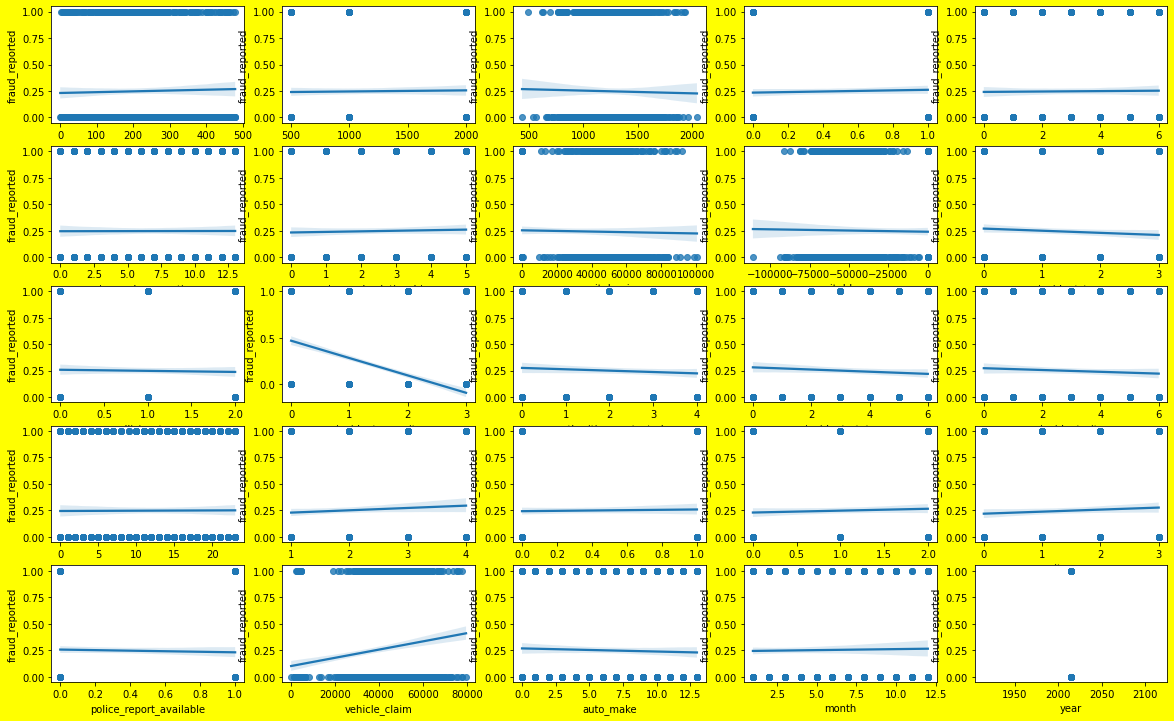

In [104]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 30:
        ax = plt.subplot(6,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above Scatter plot and regression plot, we observe some features are positively and negatively correlated with our label but mostly all features are neutral.

## Plotting Box plot to see outliers are present are not

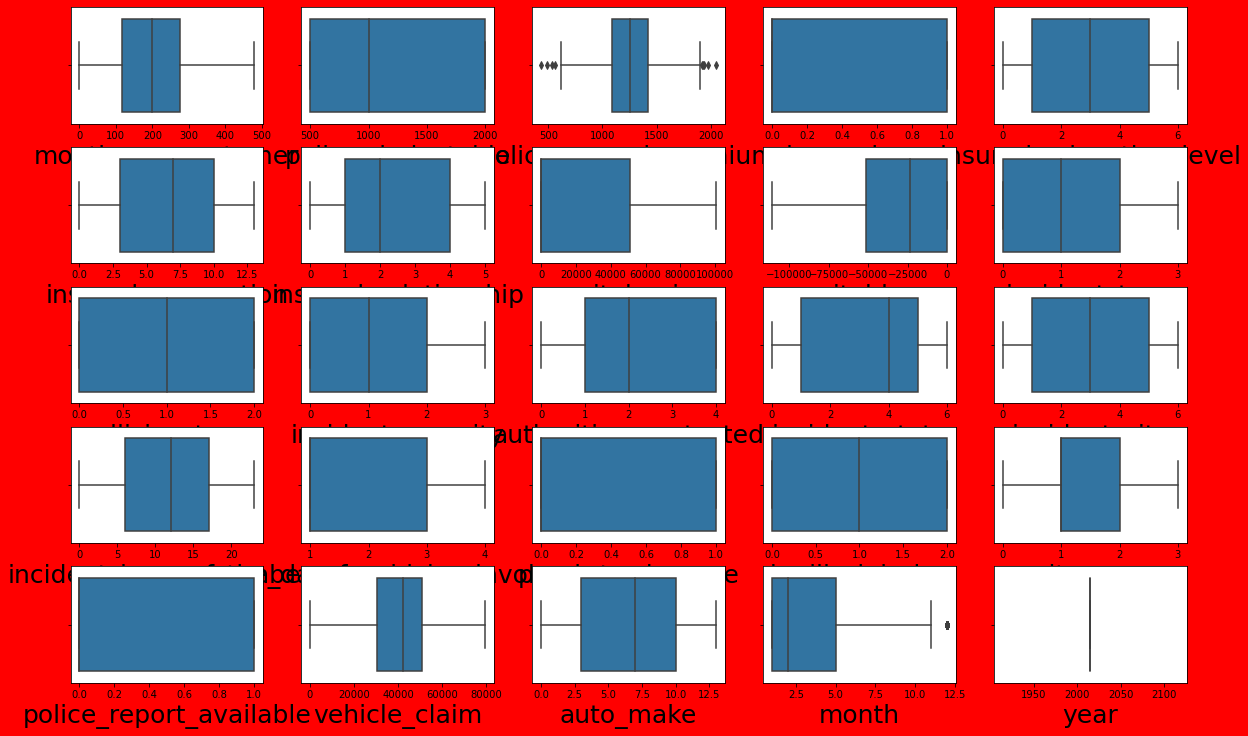

In [105]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 30:
        plt.subplot (6,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 25)
        
    graph += 1
    
plt.show()

## From above boxplot we see only 2 feature has outlier and we are going to treat it with IQR method

In [106]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim', 'auto_make',
       'fraud_reported', 'Day', 'month', 'year'],
      dtype='object')

In [107]:
df.shape

(1000, 27)

### FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

In [108]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

months_as_customer               160.5000
policy_deductable               1500.0000
policy_annual_premium            326.0875
insured_sex                        1.0000
insured_education_level            4.0000
insured_occupation                 7.0000
insured_relationship               3.0000
capital-gains                  51025.0000
capital-loss                   51500.0000
incident_type                      2.0000
collision_type                     2.0000
incident_severity                  2.0000
authorities_contacted              3.0000
incident_state                     4.0000
incident_city                      4.0000
incident_hour_of_the_day          11.0000
number_of_vehicles_involved        2.0000
property_damage                    1.0000
bodily_injuries                    2.0000
witnesses                          1.0000
police_report_available            1.0000
vehicle_claim                  20530.0000
auto_make                          7.0000
fraud_reported                    

In [109]:
#validating outlier 
preg_high = (q3.policy_annual_premium + (1.5*iqr.policy_annual_premium))
preg_high


1904.8262500000003

In [110]:
# to check how many outliers in policy_annual_premium column 
outlier_high = np.where(df['policy_annual_premium']>preg_high)
outlier_high

(array([133, 229, 544, 747, 796], dtype=int64),)

In [111]:
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape

(995, 27)

In [112]:
#once you delete you should reset index
df.reset_index()

,index,months_as_customer,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,fraud_reported,Day,month,year
0,0,328,1000,1406.91,1,4,2,0,53300,0,...,1,1,2,1,52080,10,1,25,1,2015
1,1,228,2000,1197.22,1,4,6,2,0,0,...,0,0,0,0,3510,8,1,21,1,2015
2,2,134,2000,1413.14,0,6,11,3,35100,0,...,0,2,3,0,23100,4,0,22,2,2015
3,3,256,2000,1415.74,0,6,1,4,48900,-62400,...,0,1,2,0,50720,3,1,1,10,2015
4,4,228,1000,1583.91,1,0,11,4,66000,-46000,...,0,0,1,0,4550,0,0,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,995,3,1000,1310.80,0,5,2,4,0,0,...,1,0,1,0,61040,6,0,22,2,2015
991,996,285,1000,1436.79,0,6,9,5,70900,0,...,1,2,3,0,72320,13,0,24,1,2015
992,997,130,500,1383.49,0,5,1,2,35100,0,...,0,2,3,1,52500,11,0,23,1,2015
993,998,458,2000,1356.92,1,0,5,5,0,0,...,0,0,1,1,36540,1,0,26,2,2015


In [113]:
#validating outlier 
preg_high = (q3.month + (1.5*iqr.month))
preg_high

11.0

In [114]:
# to check how many outliers in month column 
outlier_high = np.where(df['month']>preg_high)
outlier_high

(array([ 34,  62, 104, 110, 154, 180, 182, 193, 196, 311, 325, 359, 399,
        409, 423, 428, 436, 453, 494, 524, 532, 563, 576, 580, 584, 597,
        607, 667, 720, 766, 779, 864, 865, 883, 928, 934, 955, 961],
       dtype=int64),)

In [115]:
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape

(957, 27)

In [116]:
#once you delete you should reset index
df.reset_index()

,index,months_as_customer,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,fraud_reported,Day,month,year
0,0,328,1000,1406.91,1,4,2,0,53300,0,...,1,1,2,1,52080,10,1,25,1,2015
1,1,228,2000,1197.22,1,4,6,2,0,0,...,0,0,0,0,3510,8,1,21,1,2015
2,2,134,2000,1413.14,0,6,11,3,35100,0,...,0,2,3,0,23100,4,0,22,2,2015
3,3,256,2000,1415.74,0,6,1,4,48900,-62400,...,0,1,2,0,50720,3,1,1,10,2015
4,4,228,1000,1583.91,1,0,11,4,66000,-46000,...,0,0,1,0,4550,0,0,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,995,3,1000,1310.80,0,5,2,4,0,0,...,1,0,1,0,61040,6,0,22,2,2015
953,996,285,1000,1436.79,0,6,9,5,70900,0,...,1,2,3,0,72320,13,0,24,1,2015
954,997,130,500,1383.49,0,5,1,2,35100,0,...,0,2,3,1,52500,11,0,23,1,2015
955,998,458,2000,1356.92,1,0,5,5,0,0,...,0,0,1,1,36540,1,0,26,2,2015


In [117]:
#now policy_annual_premium lower

blood_low = (q1.policy_annual_premium - (1.5*iqr.policy_annual_premium))
print(blood_low)

outlier_low = np.where(df['policy_annual_premium']<blood_low)
print(outlier_low)

600.4762499999999
(array([ 42, 237, 650, 730], dtype=int64),)


In [118]:
df=df.drop(df.index[outlier_low])
print(df.shape)

df.reset_index()

(953, 27)


,index,months_as_customer,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,fraud_reported,Day,month,year
0,0,328,1000,1406.91,1,4,2,0,53300,0,...,1,1,2,1,52080,10,1,25,1,2015
1,1,228,2000,1197.22,1,4,6,2,0,0,...,0,0,0,0,3510,8,1,21,1,2015
2,2,134,2000,1413.14,0,6,11,3,35100,0,...,0,2,3,0,23100,4,0,22,2,2015
3,3,256,2000,1415.74,0,6,1,4,48900,-62400,...,0,1,2,0,50720,3,1,1,10,2015
4,4,228,1000,1583.91,1,0,11,4,66000,-46000,...,0,0,1,0,4550,0,0,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,995,3,1000,1310.80,0,5,2,4,0,0,...,1,0,1,0,61040,6,0,22,2,2015
949,996,285,1000,1436.79,0,6,9,5,70900,0,...,1,2,3,0,72320,13,0,24,1,2015
950,997,130,500,1383.49,0,5,1,2,35100,0,...,0,2,3,1,52500,11,0,23,1,2015
951,998,458,2000,1356.92,1,0,5,5,0,0,...,0,0,1,1,36540,1,0,26,2,2015


### Data loss due to removing the outliers

In [119]:
dataloss=((1000-953)/1000)*100
dataloss

4.7

## finding correlation between feature n lable using CORR method

In [120]:
#  (code type      --   feature corrwith label)

df.drop('fraud_reported' , axis =1 ).corrwith (df.fraud_reported)

months_as_customer             0.025166
policy_deductable              0.026227
policy_annual_premium         -0.013591
insured_sex                    0.025652
insured_education_level        0.017604
insured_occupation             0.003440
insured_relationship           0.024740
capital-gains                 -0.021902
capital-loss                  -0.012958
incident_type                 -0.053142
collision_type                -0.012280
incident_severity             -0.394972
authorities_contacted         -0.045687
incident_state                -0.054384
incident_city                 -0.035444
incident_hour_of_the_day       0.003900
number_of_vehicles_involved    0.053193
property_damage                0.018461
bodily_injuries                0.031036
witnesses                      0.044136
police_report_available       -0.020846
vehicle_claim                  0.170114
auto_make                     -0.031310
Day                           -0.049814
month                          0.018876


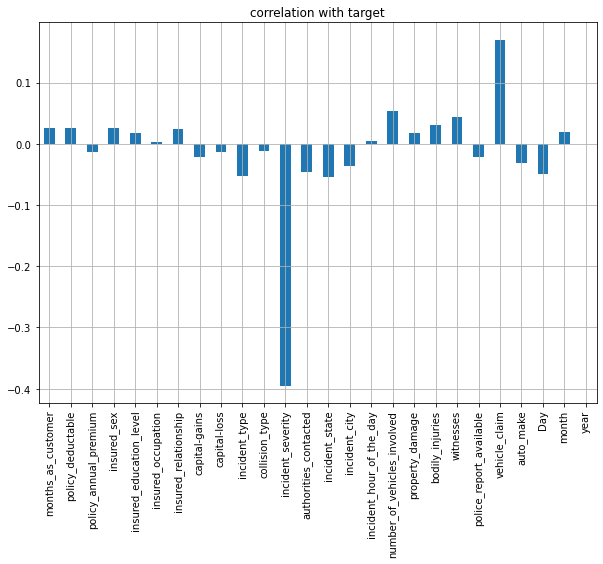

In [121]:
# convert above numbers into graph for better understanding
df.drop('fraud_reported' , axis = 1).corrwith (df.fraud_reported).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

In [122]:
X.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim', 'auto_make', 'month',
       'year'],
      dtype='object')

In [123]:
X.shape

(1000, 25)

## Scaling the data

In [124]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [125]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.033649,months_as_customer
1,1.025486,policy_deductable
2,1.026415,policy_annual_premium
3,1.019635,insured_sex
4,1.033906,insured_education_level
5,1.010135,insured_occupation
6,1.023321,insured_relationship
7,1.020459,capital-gains
8,1.028249,capital-loss
9,5.075835,incident_type


## For this problem we consider Maximum VIF is 10 and we dont see any Multi-colinearity problem so keeping all the features

## Feature selection with SelectKBest

In [126]:
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [127]:
#select best feature
# selecting 14 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=14)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (14 , 'Scores'))

                   Feature_Name      Scores
11            incident_severity  196.960603
21                vehicle_claim   29.718214
16  number_of_vehicles_involved    2.689100
13               incident_state    2.644427
9                 incident_type    2.539153
19                    witnesses    2.451026
12        authorities_contacted    2.098018
14                incident_city    1.631761
18              bodily_injuries    1.146656
3                   insured_sex    0.952144
20      police_report_available    0.770117
22                    auto_make    0.756354
6          insured_relationship    0.442135
0            months_as_customer    0.421370


In [128]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim', 'auto_make',
       'fraud_reported', 'Day', 'month', 'year'],
      dtype='object')

## we selected top 14 feature from feature selection technique

In [129]:
#Model BUilding
new_X = df[['incident_severity', 'vehicle_claim','number_of_vehicles_involved','incident_state','incident_type','witnesses','authorities_contacted','incident_city','bodily_injuries','insured_sex','police_report_available','auto_make','insured_relationship','months_as_customer']]

In [130]:
y=df.fraud_reported

In [131]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

# DecisionTreeClassifier Model

In [132]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [133]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7112970711297071 RandomState 1


MAXINING TESTING SCORE 0.7112970711297071 ON RANDOM STATE OF 1
Testing Accuracy 0.702928870292887 RandomState 2


Testing Accuracy 0.698744769874477 RandomState 3


Testing Accuracy 0.6736401673640168 RandomState 4


Testing Accuracy 0.6861924686192469 RandomState 5


Testing Accuracy 0.698744769874477 RandomState 6


Testing Accuracy 0.702928870292887 RandomState 7


Testing Accuracy 0.6903765690376569 RandomState 8


Testing Accuracy 0.7531380753138075 RandomState 9


MAXINING TESTING SCORE 0.7531380753138075 ON RANDOM STATE OF 9
Testing Accuracy 0.7154811715481172 RandomState 10


Testing Accuracy 0.7280334728033473 RandomState 11


Testing Accuracy 0.6778242677824268 RandomState 12


Testing Accuracy 0.6610878661087866 RandomState 13


Testing Accuracy 0.6736401673640168 RandomState 14


Testing Accuracy 0.7196652719665272 RandomState 15


Testing Accuracy 0.6736401673640168 RandomState 16


Testing Accuracy 0.702928870292887 Rand

In [134]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7698744769874477 On Random State 47


In [135]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=47)

In [136]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [137]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [138]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 72.384937%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.82      0.80      0.81       179
           1       0.45      0.48      0.47        60

    accuracy                           0.72       239
   macro avg       0.64      0.64      0.64       239
weighted avg       0.73      0.72      0.73       239



## Model Score 
    Training Score = 100.000000 %
    Testing Score = 72.384937 %

## Hyperparameter For DecisionTree Classifier

In [139]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [140]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [141]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [142]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [143]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 4, min_samples_leaf= 3, min_samples_split= 6)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6)

In [144]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 84.033613%
====Testing Score====
Accuracy score : 79.497908%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.91      0.87       179
           1       0.62      0.47      0.53        60

    accuracy                           0.79       239
   macro avg       0.73      0.69      0.70       239
weighted avg       0.78      0.79      0.78       239



## Model Scores With Hyperparameter Tuning
* Training Score = 84.033613%
* Testing Score = 79.497908%

## Cross Validation score for DecisionTree Classifier

In [145]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X_scalar,y,cv=6)

array([0.78616352, 0.74213836, 0.74213836, 0.7672956 , 0.79245283,
       0.85443038])

In [146]:
cross_val_score(clf_dt,X_scalar,y,cv=6).mean()

0.7818180611947033

## Confusion Matrix DecisionTree Classifier

In [147]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[162,  17],
       [ 32,  28]], dtype=int64)

# RandomForestClassifier

In [148]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [149]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7656903765690377 RandomState 1


MAXINING TESTING SCORE 0.7656903765690377 ON RANDOM STATE OF 1
Testing Accuracy 0.8200836820083682 RandomState 2


MAXINING TESTING SCORE 0.8200836820083682 ON RANDOM STATE OF 2
Testing Accuracy 0.7782426778242678 RandomState 3


Testing Accuracy 0.7615062761506276 RandomState 4


Testing Accuracy 0.7698744769874477 RandomState 5


Testing Accuracy 0.7698744769874477 RandomState 6


Testing Accuracy 0.7196652719665272 RandomState 7


Testing Accuracy 0.7782426778242678 RandomState 8


Testing Accuracy 0.799163179916318 RandomState 9


Testing Accuracy 0.7615062761506276 RandomState 10


Testing Accuracy 0.7866108786610879 RandomState 11


Testing Accuracy 0.7573221757322176 RandomState 12


Testing Accuracy 0.7573221757322176 RandomState 13


Testing Accuracy 0.8200836820083682 RandomState 14


Testing Accuracy 0.7489539748953975 RandomState 15


Testing Accuracy 0.7447698744769874 RandomState 16


Testing Accuracy 0.7740585774058577 

In [150]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8326359832635983 On Random State 72


In [151]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=72)

In [152]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [153]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [154]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 84.100418%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.96      0.91       188
           1       0.74      0.39      0.51        51

    accuracy                           0.84       239
   macro avg       0.80      0.68      0.71       239
weighted avg       0.83      0.84      0.82       239



## Model Scores 
* Training Score = 100.000000%
* Testing Score = 84.100418%

## Hyperparameter For RandomForestClassifier

In [155]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [156]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [157]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [158]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 3}


In [163]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 25, min_samples_leaf=7, min_samples_split= 5,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=25, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=10)

In [164]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.294118%
====Testing Score====
Accuracy score : 83.263598%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.94      0.90       188
           1       0.67      0.43      0.52        51

    accuracy                           0.83       239
   macro avg       0.76      0.69      0.71       239
weighted avg       0.82      0.83      0.82       239



## Model Scores With Hyperparameter Tuning
* Training Score = 85.294118%
* Testing Score = 83.263598%

## Cross Validation score for RandomForestClassifier

In [165]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_scalar,y,cv=6)

array([0.77987421, 0.76100629, 0.7672956 , 0.7672956 , 0.80503145,
       0.85443038])

In [166]:
cross_val_score(rf,X_scalar,y,cv=6).mean()

0.7765437995913277

## Confusion Matrix RandomForestClassifier

In [167]:
### if you want to check confusion matrix

y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[181,   7],
       [ 31,  20]], dtype=int64)

# Support Vector Machine Model

In [168]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

In [169]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7489539748953975 RandomState 1


MAXINING TESTING SCORE 0.7489539748953975 ON RANDOM STATE OF 1
Testing Accuracy 0.7949790794979079 RandomState 2


MAXINING TESTING SCORE 0.7949790794979079 ON RANDOM STATE OF 2
Testing Accuracy 0.7364016736401674 RandomState 3


Testing Accuracy 0.7531380753138075 RandomState 4


Testing Accuracy 0.6861924686192469 RandomState 5


Testing Accuracy 0.7615062761506276 RandomState 6


Testing Accuracy 0.7154811715481172 RandomState 7


Testing Accuracy 0.7740585774058577 RandomState 8


Testing Accuracy 0.7824267782426778 RandomState 9


Testing Accuracy 0.7322175732217573 RandomState 10


Testing Accuracy 0.7824267782426778 RandomState 11


Testing Accuracy 0.7489539748953975 RandomState 12


Testing Accuracy 0.7698744769874477 RandomState 13


Testing Accuracy 0.7698744769874477 RandomState 14


Testing Accuracy 0.7071129707112971 RandomState 15


Testing Accuracy 0.7322175732217573 RandomState 16


Testing Accuracy 0.7364016736401674

In [170]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8117154811715481 On Random State 64


In [175]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=64)

In [176]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [177]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [178]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.294118%
====Testing Score====
Accuracy score : 81.171548%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89       187
           1       0.67      0.27      0.38        52

    accuracy                           0.81       239
   macro avg       0.75      0.62      0.64       239
weighted avg       0.79      0.81      0.78       239



## Model Scores 
* Training Score = 85.294118%
* Testing Score = 81.171548%

## Hyperparameter Tuning for SVC

In [179]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [180]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [181]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [182]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [183]:
#best parameters
gridsearch.best_params_

{'C': 10, 'gamma': 0.01}

In [184]:
# update our model and train again for new score 
svc=SVC(C=10,gamma=0.01)
svc.fit(X_train_ns,y_train_ns)

SVC(C=10, gamma=0.01)

In [185]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 80.812325%
====Testing Score====
Accuracy score : 82.426778%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.88      0.90      0.89       187
           1       0.60      0.56      0.58        52

    accuracy                           0.82       239
   macro avg       0.74      0.73      0.73       239
weighted avg       0.82      0.82      0.82       239



## Model Scores With Hyperparameter Tuning
    Training Score = 80.812325%
    Testing Score = 82.426778%

## Cross Validation score for SVC

In [186]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,X_scalar,y,cv=6)

array([0.7672956 , 0.7672956 , 0.75471698, 0.77358491, 0.77358491,
       0.76582278])

In [188]:
cross_val_score(svc,X_scalar,y,cv=6).mean()

0.7670501287052517

## Confusion Matrix for SVC

In [189]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[168,  19],
       [ 23,  29]], dtype=int64)

# KNeighborsClassifier Model

In [190]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [191]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8410041841004184 RandomState 1


MAXINING TESTING SCORE 0.8410041841004184 ON RANDOM STATE OF 1
Testing Accuracy 0.8786610878661087 RandomState 2


MAXINING TESTING SCORE 0.8786610878661087 ON RANDOM STATE OF 2
Testing Accuracy 0.8368200836820083 RandomState 3


Testing Accuracy 0.8410041841004184 RandomState 4


Testing Accuracy 0.8326359832635983 RandomState 5


Testing Accuracy 0.8577405857740585 RandomState 6


Testing Accuracy 0.7866108786610879 RandomState 7


Testing Accuracy 0.8535564853556485 RandomState 8


Testing Accuracy 0.8535564853556485 RandomState 9


Testing Accuracy 0.8493723849372385 RandomState 10


Testing Accuracy 0.8577405857740585 RandomState 11


Testing Accuracy 0.8368200836820083 RandomState 12


Testing Accuracy 0.8410041841004184 RandomState 13


Testing Accuracy 0.8577405857740585 RandomState 14


Testing Accuracy 0.8410041841004184 RandomState 15


Testing Accuracy 0.8451882845188284 RandomState 16


Testing Accuracy 0.8451882845188284

In [192]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.891213389121339 On Random State 77


In [193]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=77)

In [194]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [195]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier()

In [196]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.092437%
====Testing Score====
Accuracy score : 73.221757%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.77      0.90      0.83       177
           1       0.47      0.24      0.32        62

    accuracy                           0.73       239
   macro avg       0.62      0.57      0.58       239
weighted avg       0.69      0.73      0.70       239



## Model Scores
* Training Score = 81.092437%
* Testing Score = 73.221757%

## Hyperparameter For KNeighborsClassifier

In [197]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [198]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [199]:
#give the data to object
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [200]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [201]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [202]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 77.030812%
====Testing Score====
Accuracy score : 74.058577%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.75      0.97      0.85       177
           1       0.50      0.08      0.14        62

    accuracy                           0.74       239
   macro avg       0.63      0.53      0.49       239
weighted avg       0.69      0.74      0.66       239



## Model Scores With Hyperparameter Tuning¶
* Training Score = 77.030812%
* Testing Score = 74.058577%

## Cross Validation score for KNN

In [203]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_knn,X_scalar,y,cv=6)

array([0.74213836, 0.76100629, 0.74213836, 0.74842767, 0.76100629,
       0.77848101])

In [204]:
cross_val_score(clf_knn,X_scalar,y,cv=6).mean()

0.7555329989650504

## Confusion Matric for KNN

In [205]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[172,   5],
       [ 57,   5]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [206]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

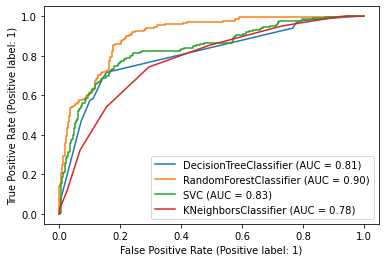

In [207]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Testing Data

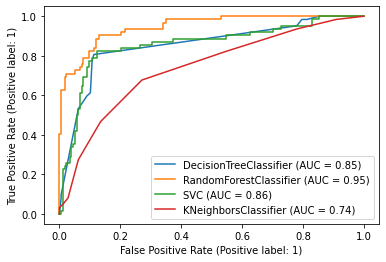

In [208]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [209]:
clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 4, min_samples_leaf= 3, min_samples_split= 6)
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=6)

In [210]:
rf=RandomForestClassifier(criterion= 'gini', max_depth = 25, min_samples_leaf=7, min_samples_split= 5,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=25, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=10)

In [211]:
svc=SVC(C=10,gamma=0.01)
svc.fit(X_train_ns,y_train_ns)

SVC(C=10, gamma=0.01)

In [212]:
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

## AUC-ROC Curve for Training Data With Hyperparameter tuning

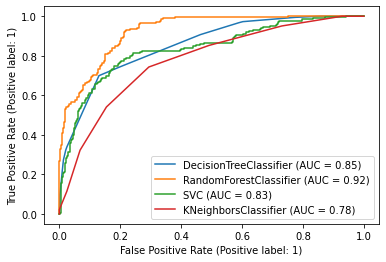

In [213]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Testing Data With Hyperparameter Tuning

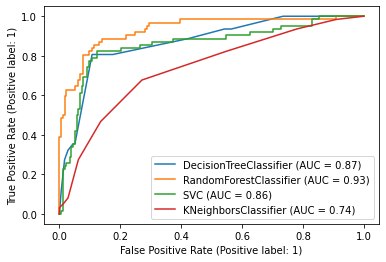

In [214]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## From All 4 Models and AUC-ROC Curve, we observe Random Forest is best suited for this problem as after hyperparameter tuning the training score is 92% and the testing score is 93% so selecting Random Forest Model for this particular Problem.

## Saving the Best Model

In [215]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))